In [55]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("train.csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df = df.drop(columns = ['Cabin'])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [5]:
df['Embarked'].mode()[0]

'S'

In [6]:
df.fillna({'Age' : df['Age'].mean() , 'Embarked' : df['Embarked'].mode()[0]}, inplace = True)

In [7]:
df = df.drop(columns = ['SibSp', 'PassengerId', 'Ticket', 'Parch', 'Name'])

In [8]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
df.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked
795,0,2,male,39.000000,13.0000,S
85,1,3,female,33.000000,15.8500,S
417,1,2,female,18.000000,13.0000,S
827,1,2,male,1.000000,37.0042,C
358,1,3,female,29.699118,7.8792,Q


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 1], test_size = 0.3, random_state = 0) 
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
857,1,male,51.000000,26.5500,S
52,1,female,49.000000,76.7292,C
386,3,male,1.000000,46.9000,S
124,1,male,54.000000,77.2875,S
578,3,female,29.699118,14.4583,C


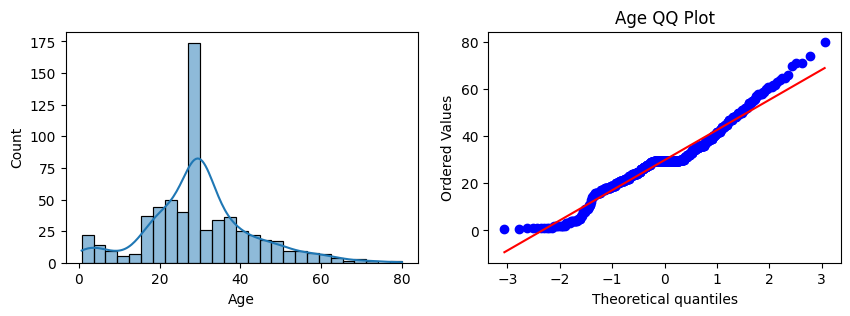

In [52]:
plt.figure(figsize = (10, 3))
plt.subplot(121)
sns.histplot(X_train['Age'], kde = True)
plt.subplot(122)
plt.title('Fare PDF')
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')


plt.show()

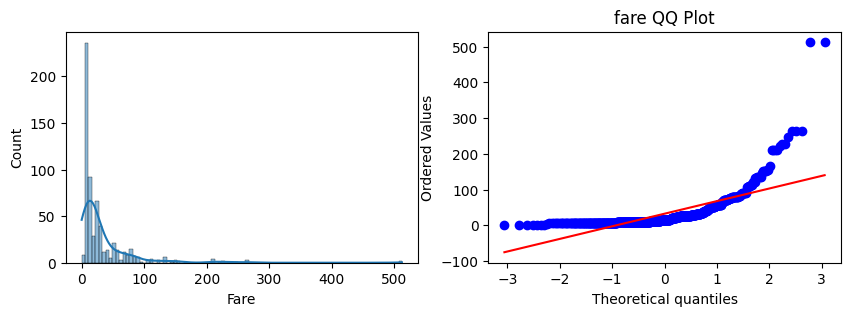

In [50]:
plt.figure(figsize = (10, 3))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde = True)
plt.subplot(122)
plt.title('Fare PDF')
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('fare QQ Plot')


plt.show()

In [56]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [107]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [108]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder( drop = 'first' , sparse_output = False, handle_unknown = 'ignore')
X_train['Sex'].sample(4)
X_train_one_hot = pd.DataFrame(ohe.fit_transform(X_train[['Sex']]), columns = ['Sex'])
X_train_one_hot_encoded = pd.concat([X_train.drop(labels = ['Sex'], axis = 1), X_train_one_hot], axis = 1)
# X_train_one_hot_encoded.isnull().sum()

Pclass      186
Age         186
Fare        186
Embarked    186
Sex         186
dtype: int64

In [58]:
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'male'